<font size ="8"> <div align="center">**BigMart Sales Prediction using Machine Learning Regression Models**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

-----------------------------
# **Context of the Project (BigMart Sales)**
-----------------------------
<p align = "justify">
In today’s modern world, huge shopping centers such as big malls and marts are recording data related to sales of items or products as an important step to predict the sales and get an idea about future demands that can help with inventory management. Understanding what role certain properties of an item play and how they affect their sales is imperative to any retail business
<p align = "justify">
The Data Scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. Using this data, **BigMart is trying to understand the properties of products and stores which play a key role in increasing sales**.

-----------------------------
## **Data Description:**
-----------------------------
We have two datasets
- train (8523) and
- test (5681) data

<p align = "justify">
The training dataset has both input and output variable(s). The data may have missing values as some stores might not report all the data due to technical glitches.

- **Item_Identifier** : Unique product ID
- **Item_Weight** : Weight of the product
- **Item_Fat_Content** : Whether the product is low fat or not
- **Item_Visibility** : The % of the total display area of all products in a store allocated to the particular product
- **Item_Type** : The category to which the product belongs
- **Item_MRP** : Maximum Retail Price (list price) of the product
- **Outlet_Identifier** : Unique store ID
- **Outlet_Establishment_Year** : The year in which the store was established
- **Outlet_Size** : The size of the store in terms of ground area covered
- **Outlet_Location_Type** : The type of city in which the store is located
- **Outlet_Type** : Whether the outlet is just a grocery store or some sort of supermarket
- **Item_Outlet_Sales** : Sales of the product in the particular store. This is the outcome variable to be predicted.


-----------------------------
## **Project Objectives**
-----------------------------

To build a predictive model that can find out the sales of each product at a particular store and then provide actionable recommendations to the BigMart sales team to understand the properties of products and stores which play a key role in increasing sales.



### **Importing the libraries and Dataset Overview**

**Importing Libraries**

In [1]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Mounting Google Drive and Loading the datasets**

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Loading both train and test datasets
path_train = '/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/4 Supervised Learning - Regression and Prediction/5 Mentored Learning Session/Dataset - Training.csv'
path_test = '/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/4 Supervised Learning - Regression and Prediction/5 Mentored Learning Session/Dataset - Testing.csv'
train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)

**Quick look at the data**

In [5]:
# Checking the first 5 rows of the training dataset
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Checking the first 5 rows of the testing dataset
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


- As the variables **`Item_Identifier`** and **`Outlet_Identifier`** are only ID variables, we assume that they don't have any predictive power to predict the dependent variable - **`Item_Outlet_Sales`**.
- We will remove these two variables from both the datasets.

In [7]:
# Dropping Item_ID and outlet_ID columns
train_df = train_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)
test_df = test_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)

**Understanding the shape of the data and its datatypes**

In [8]:
# Viewing the number of rows and columns
print(f"There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in the training dataset.")
print(f"There are {test_df.shape[0]} rows and {test_df.shape[1]} columns in the testing dataset")

There are 8523 rows and 10 columns in the training dataset.
There are 5681 rows and 9 columns in the testing dataset


* From above, the training dataset contains 8523 data points with 10 columns
* On the other hand, the testing dataset contains 5681 data points with only 9 columns (as the `Item_Outlet_Sales` column has been removed)

In [ ]:
# Checking the info of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


- The train dataset has **8523 observations and 10 columns**.
- Two columns **Item_Weight** and **Outlet_Size** have missing values as the number of non-null values is less the total number of observations for these two variables.
- We observe that the columns **Item_Fat_Content**, **Item_Type**, **Outlet_Size**, **Outlet_Location_Type**, and **Outlet_Type** have data type **object**, which means they are strings or categorical variables.
- The remaining variables are all numerical in nature.

**Checking for Missing Values**

In [10]:
# Printing out the percentage of missing values in each column
(train_df.isnull().sum() / train_df.shape[0])*100

,0
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000
Outlet_Type,0.000000
Item_Outlet_Sales,0.000000


* The percentage of missing values for the columns **`Item_Weight`** and **`Outlet_Size`** is ~17% and ~28% respectively. These can be treated by carrying out a comprehensive Data Analysis

### **Exploratory Data Analysis**

#### **Univariate Analysis**

> **Looking at Categorical Columns in the Dataset**

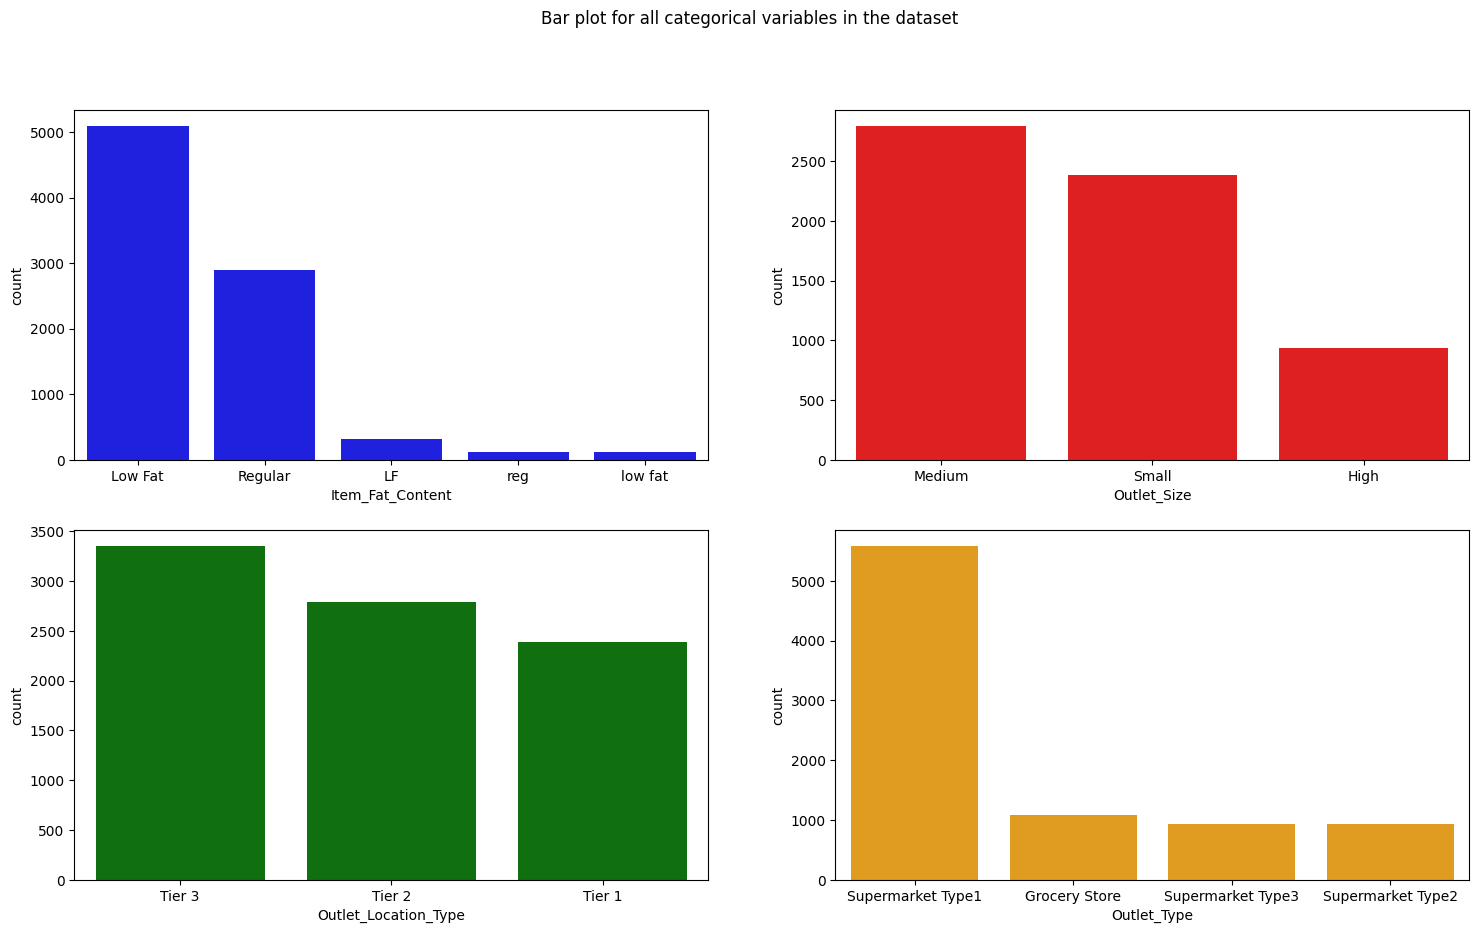

In [11]:
# Creating 4 subplots to plot four out of the five categorical variables in a single frame.

# Initializing the plot layout
fig, axes = plt.subplots(2, 2, figsize = (18, 10))
fig.suptitle('Bar plot for all categorical variables in the dataset')

# Plotting Item_Fat_Content column according to decreasing counts
sns.countplot(ax = axes[0, 0], x = 'Item_Fat_Content', data = train_df, color = 'blue',
              order = train_df['Item_Fat_Content'].value_counts().index);

# Plotting Outlet_Size column according to decreasing counts
sns.countplot(ax = axes[0, 1], x = 'Outlet_Size', data = train_df, color = 'red',
              order = train_df['Outlet_Size'].value_counts().index);

# Plotting Outlet_Location_Type column according to decreasing counts
sns.countplot(ax = axes[1, 0], x = 'Outlet_Location_Type', data = train_df, color = 'green',
              order = train_df['Outlet_Location_Type'].value_counts().index);

# Plotting Item_Fat_Content column according to decreasing counts
sns.countplot(ax = axes[1, 1], x = 'Outlet_Type', data = train_df, color = 'orange',
              order = train_df['Outlet_Type'].value_counts().index);

- From the above univariate plot for the variable **`Item_Fat_Content`**, it seems like there are errors in the data. The category - **`Low Fat`** is also written as **`low fat`** and **`LF`**. Similarly, the category **`Regular`** is also written as **`reg`** sometimes. So, **we need to fix this issue in the data**.
- For the column **`Outlet_Size`**, we can see that the most common category is - **`Medium`** followed by Small and High.
- The most common category for the column **`Outlet_Location_Type`** is **`Tier 3`**, followed by Tier 2 and Tier 1. This makes sense now if we combine this information with the information on column **`Outlet_Size`**. We would expect High outlet size stores to be present in Tier 1 cities and the count of tier 1 cities is less so the count of high outlets size is also less. And we would expect more medium and small outlet sizes in the dataset because we have more number outlets present in tier 3 and tier 2 cities in the dataset.
- In the column **`Outlet_Type`**, the majority of the stores are of **`Supermarket Type 1`** and we have a less and almost equal number of representatives in the other categories - Supermarket Type 2, Supermarket Type 3, and Grocery Store.

*Taking a closer look at **`Item_Type`** column*

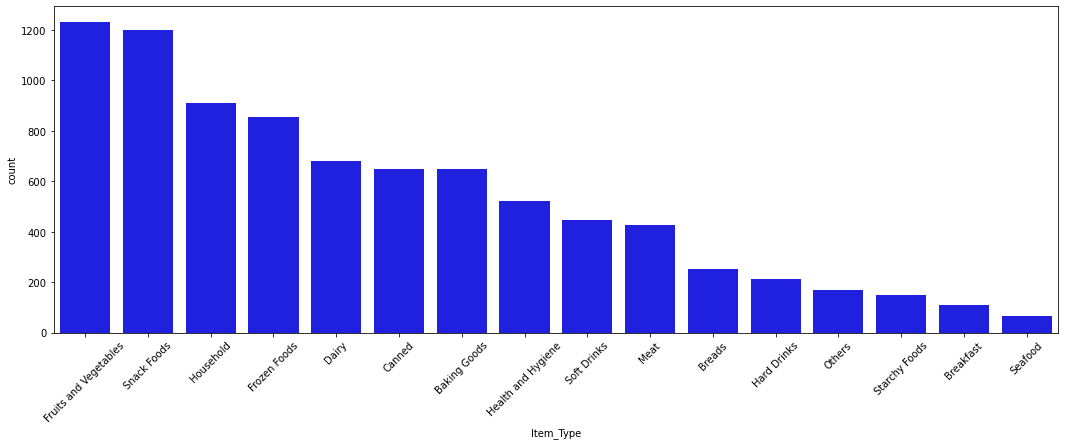

In [ ]:
# Generating countplot for the Item_Type Column
fig = plt.figure(figsize = (18, 6))
sns.countplot(x = 'Item_Type', data = train_df, color = 'blue', order = train_df['Item_Type'].value_counts().index);
plt.xticks(rotation = 45);

**Observation:**

- From the above plot, we observe that majority of the items sold in these stores are **Fruits and Vegetables**, followed by **Snack Foods** and **Household items**.

*Rectifying the `Item_Fat_Content` column on both Training and Test Dataset*



In [ ]:
# Replacing the categories - low fat and LF by Low Fat and reg by *Regular using lambda function for the Training data.
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x == 'low fat' or x == 'LF' else x)
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].apply(lambda x: 'Regular' if x == 'reg' else x)

In [ ]:
# Replacing the categories - low fat and LF by Low Fat and reg by *Regular using lambda function For the testing data.
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x == 'low fat' or x == 'LF' else x)
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].apply(lambda x: 'Regular' if x == 'reg' else x)

> **Looking at Numerical Columns in the Dataset**

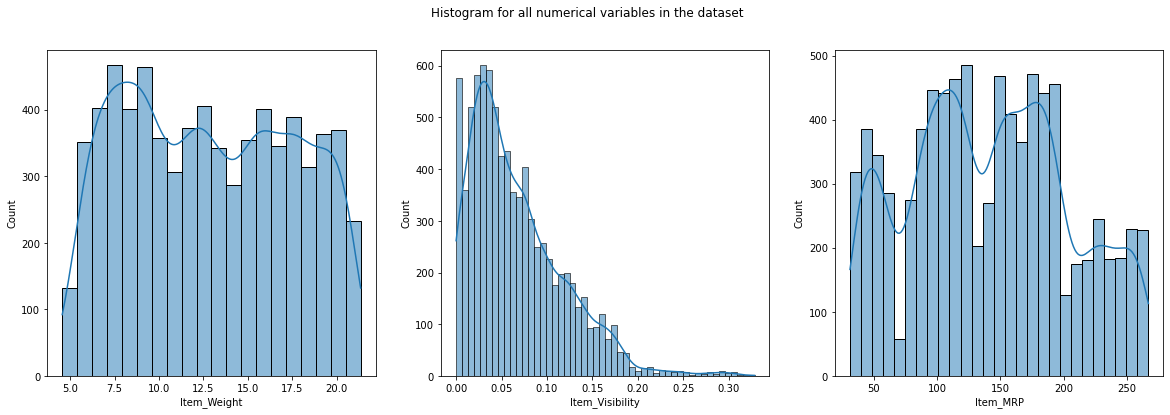

In [ ]:
# Creating 3 subplots to plot the 3 numerical variables in a single frame.

# Initializing the plot layout
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
fig.suptitle('Histogram for all numerical variables in the dataset')

# Plotting Item_Weight column distribution
sns.histplot(x = 'Item_Weight', data = train_df, kde = True, ax = axes[0]);

# Plotting Item_Visibility column distribution
sns.histplot(x = 'Item_Visibility', data = train_df, kde = True, ax = axes[1]);

# Plotting Item_MRP column distribution
sns.histplot(x = 'Item_MRP', data = train_df, kde = True, ax = axes[2]);

- The variable **Item_Weight** is approx uniformly distributed and when we will impute the missing values for this column, we will need to keep in mind that we don't end up changing the distribution significantly after imputing those missing values.
- The variable **Item_Visibility** is a right-skewed distribution which means that there are certain items whose percentage of the display area is much higher than the other items.
- The variable **Item_MRP** is following an approx multi-modal normal distribution.

#### **Bivariate Analysis**

> **Checking the Item_Outlet_Sales across years**

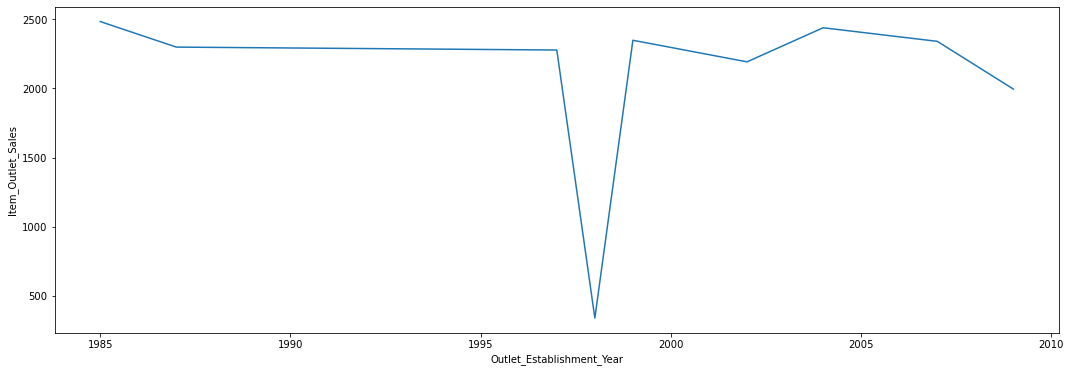

In [ ]:
# Generating a time seris plot of the total sales
fig = plt.figure(figsize = (18, 6))
sns.lineplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = train_df, ci = None, estimator = 'mean');

- The average sales are almost constant every year, we don't see any increasing/decreasing trend in sales with time. So, the variable year might not be a good predictor to predict sales, which we can check later in the modeling phase.
- Also, in the year 1998, the average sales plummeted. This might be due to some external factors which are not included in the data.

> **Checking correlation between numerical variables**

*Calculating correlation coefficients*

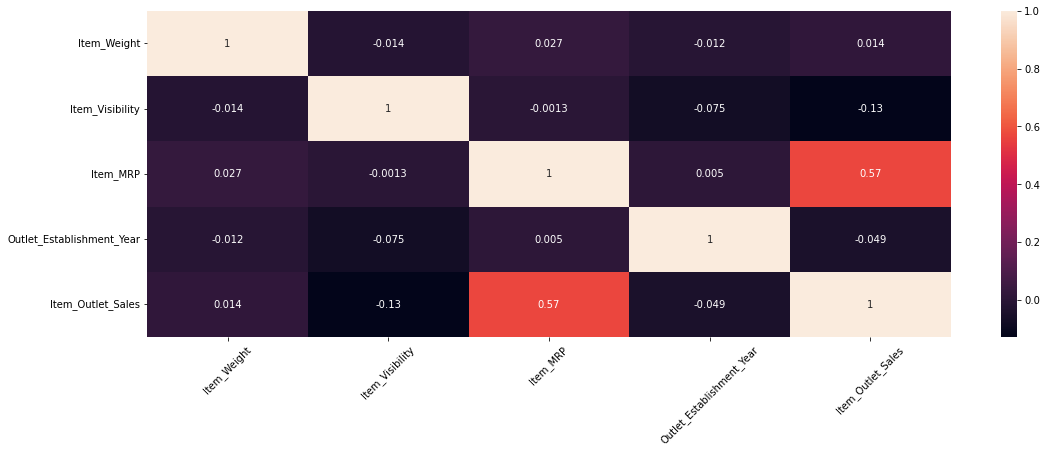

In [ ]:
# Generating a heatmap showing correlation coefficients between numerical columns
fig = plt.figure(figsize = (18, 6))
sns.heatmap(train_df.corr(), annot = True);
plt.xticks(rotation = 45);

**Observations:**

- From the above plot, it seems that only the independent variable **Item_MRP** has a moderate linear relationship with the dependent variable **Item_Outlet_Sales**.
- For the remaining, it does not seem like there is any strong positive/negative correlation between the variables.

*Creating the bivariate scatter plots to check relationships between the pair of independent and dependent variables*

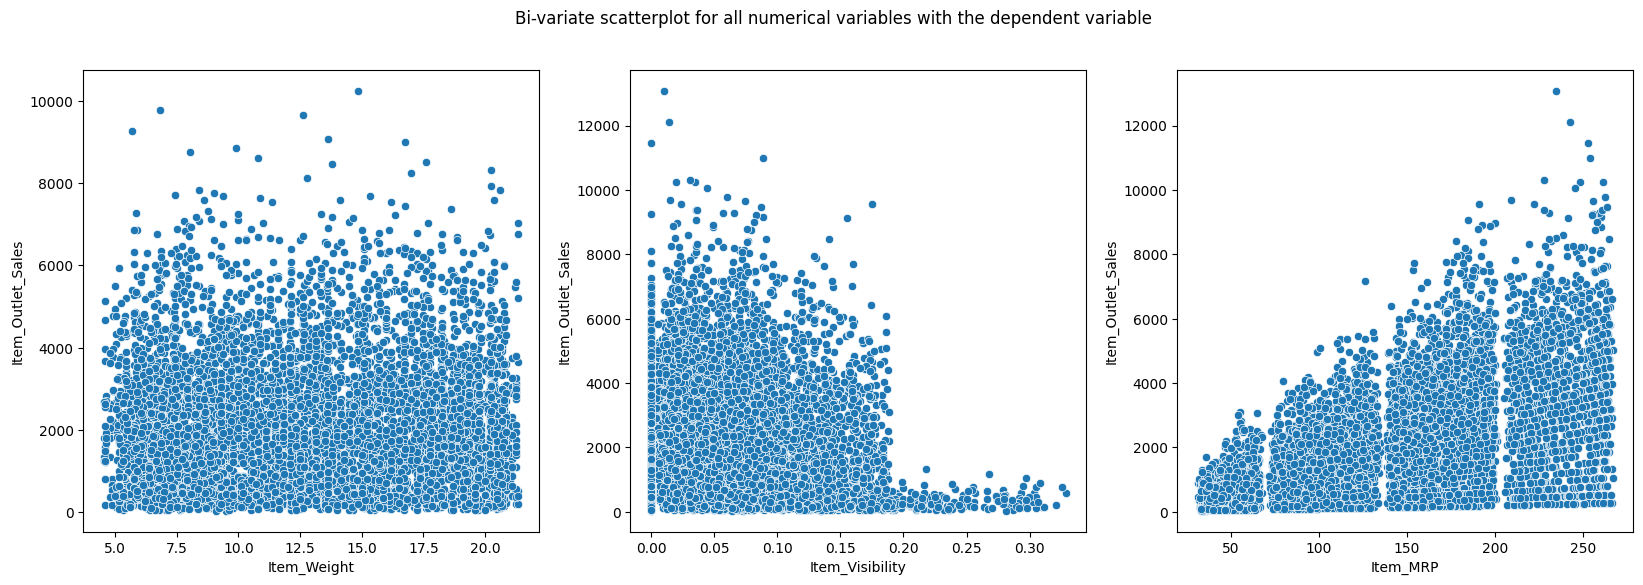

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Bi-variate scatterplot for all numerical variables with the dependent variable')

sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = train_df, ax = axes[0]);

sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = train_df, ax = axes[1]);

sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = train_df, ax = axes[2]);

- The first scatter plot shows the data is completely random and there is no relationship between **`Item_Weight`** and **`Item_outlet_Sales`**. This is also evident from the correlation value which we got above, i.e., there is no strong correlation between these two variables.
- The second scatter plot between **`Item_Visibility`** and **`Item_outlet_Sales`** shows that there is no strong relationship between them. But we can see a pattern, as the **`Item_Visibility`** increases from **0.19**, the sales decrease. This might be due to the reason that the management has given more visibility to those items which are not generally sold often, thinking that better visibility would increase the sales. This information can also help us to engineer new features like - a categorical variable with categories - **high visibility** and **low visibility**. But we are not doing that here. This is an idea, we may want to pursue in the future.
- From the third scatter plot between the variables - **`Item_MRP`** and **`Item_outlet_Sales`**, it is clear that there is a positive correlation between them, and the variable **`Item_MRP`** would have a good predictive power to predict the sales.

### **Data Preprocessing**

#### **Missing Value Treatment**

> **Imputing missing values for `Item_Weight` column**

*Checking relationship of `Item_Weight` with `Item_Fat_Content` and `Item_Type`*

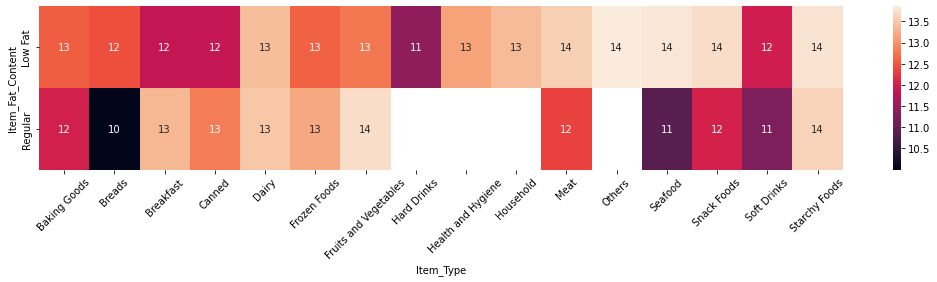

In [ ]:
# Generating a visualization of the relationship of Item_Weight with Item_Type and Item_Fat_Content
fig = plt.figure(figsize = (18, 3))
sns.heatmap(train_df.pivot_table(index = 'Item_Fat_Content', columns = 'Item_Type', values = 'Item_Weight'), annot = True);
plt.xticks(rotation = 45);

- In the above heatmap, we can see that, based on different combinations of **Item_Types** and **Item_Fat_Content**, the average range of values for the column **Item_Weight** lies between the minimum value of 10 and the maximum value of 14.

*Checking relationship of `Item_Weight` with `Outlet_Type` and `Outlet_Location_Type`*

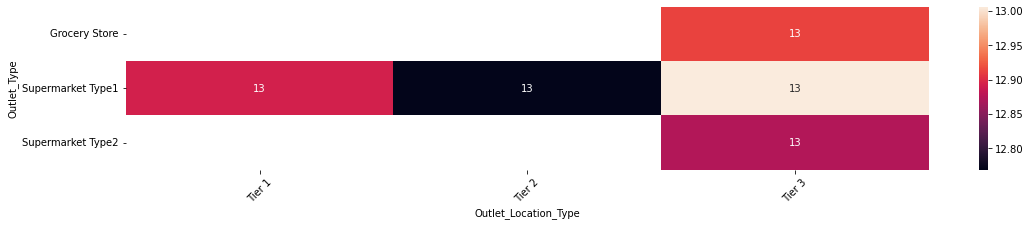

In [ ]:
# Generating a visualization of the relationship of Item_Weight with Outlet_Type and Outlet_location_Type
fig = plt.figure(figsize = (18, 3))
sns.heatmap(train_df.pivot_table(index = 'Outlet_Type', columns = 'Outlet_Location_Type', values = 'Item_Weight'), annot = True);
plt.xticks(rotation = 45);

- In the above heatmap, we can see that, based on different combinations of **Outlet_Type** and **Outlet_Location_Type**, the average range of values for the column **Item_Weight** is constant at 13.

*Checking relationship of `Item_Weight` with `Outlet_Size` and `Item_Fat_Content`*

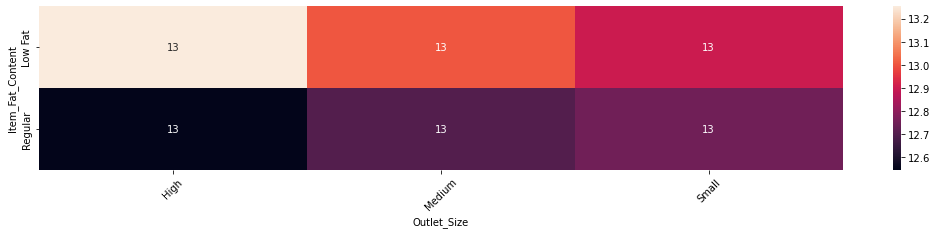

In [ ]:
# Generating a visualization of the relationship of Item_Weight with Item_Fat_Content and Outlet_Size
fig = plt.figure(figsize = (18, 3))
sns.heatmap(train_df.pivot_table(index = 'Item_Fat_Content', columns = 'Outlet_Size', values = 'Item_Weight'), annot = True);
plt.xticks(rotation = 45);

**Observation:**

- In the above heatmap, we can see that, based on different combinations of **Item_Fat_Content** and **Outlet_Size**, the average range of values for the column **Item_Weight** is also constant at 13.

*Imputing the missing values using a uniform distribution with parameters a=10 and b=14*

In [ ]:
# Imputing on the training dataset
item_weight_indices_to_be_updated = train_df[train_df['Item_Weight'].isnull()].index
train_df.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14, len(item_weight_indices_to_be_updated))

In [ ]:
# Imputing on the testing dataset
item_weight_indices_to_be_updated = test_df[test_df['Item_Weight'].isnull()].index
test_df.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14, len(item_weight_indices_to_be_updated))

> **Imputing missing values for `Outlet_Size` Column**

*Checking the distribution of the other variables in the dataset where **Outlet_Size** is missing to identify if there is any pattern present or not*

In [ ]:
# Creating two data subsets separating data with Outlet_Size missing values and data without Outlet_Size missing values
outlet_size_data = train_df[train_df['Outlet_Size'].notnull()]
outlet_size_missing_data = train_df[train_df['Outlet_Size'].isnull()]

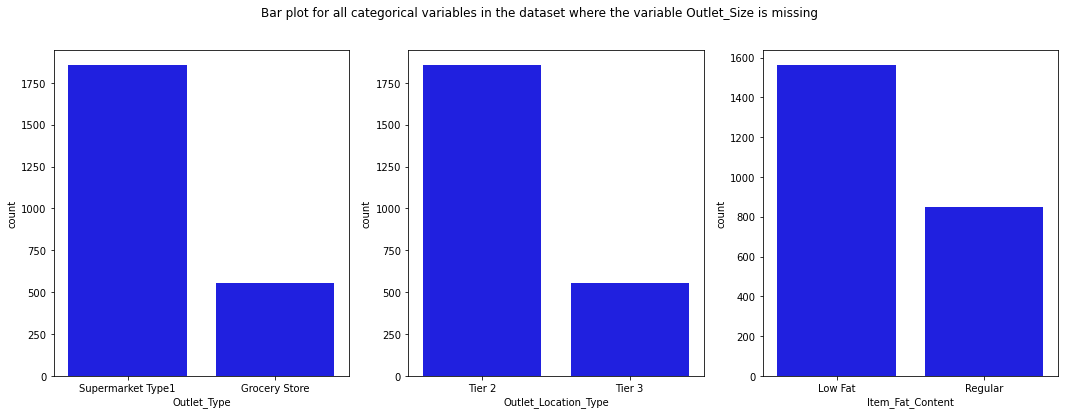

In [ ]:
# Creating subplots to plot categorical variables in data where Outlet_Size is missing.

# Initializing the plot layout
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
fig.suptitle('Bar plot for all categorical variables in the dataset where the variable Outlet_Size is missing')

sns.countplot(ax = axes[0], x = 'Outlet_Type', data = outlet_size_missing_data, color = 'blue',
              order = outlet_size_missing_data['Outlet_Type'].value_counts().index);

sns.countplot(ax = axes[1], x = 'Outlet_Location_Type', data = outlet_size_missing_data, color = 'blue',
              order = outlet_size_missing_data['Outlet_Location_Type'].value_counts().index);

sns.countplot(ax = axes[2], x = 'Item_Fat_Content', data = outlet_size_missing_data, color = 'blue',
              order = outlet_size_missing_data['Item_Fat_Content'].value_counts().index);

- We can see that, wherever **Outlet_Size** is missing in the dataset, the majority of them have **Outlet_Type** as Supermarket Type 1, **Outlet_Location_Type** as Tier 2, and **Item_Fat_Content** as **Low Fat**.

Now, we are creating a cross-tab of all the above categorical variables against the column **Outlet_Size**, where we want to impute the missing values.

*Checking relationship of `Outlet_Type` and `Outlet_Size`*

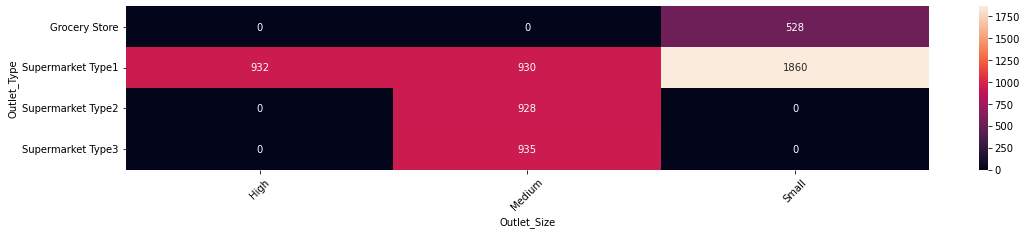

In [ ]:
# Generating a visual plot of Outlet_Type - Outlet_Size relation
fig= plt.figure(figsize = (18, 3))
sns.heatmap(pd.crosstab(index = outlet_size_data['Outlet_Type'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')
plt.xticks(rotation = 45);

- We observe from the above heatmap that all the grocery stores have **Outlet_Size** as small.
- All the Supermarket Type 2 and Supermarket Type 3 have **Outlet_Size** as Medium.

*Checking relationship of `Outlet_Location_Type` and `Outlet_Size`*

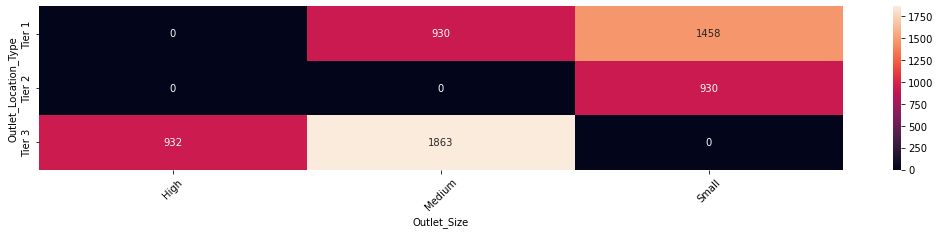

In [ ]:
# Generating a visual plot of Outlet_Location_Type - Outlet_Size relation
fig = plt.figure(figsize = (18, 3))
sns.heatmap(pd.crosstab(index = outlet_size_data['Outlet_Location_Type'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')
plt.xticks(rotation = 45);

**Observation:**

- We observe from the above heatmap that all the Tier 2 stores have **Outlet_Size** as Small.

*Checking relationship of `Item_Fat_Content` and `Outlet_Size`*

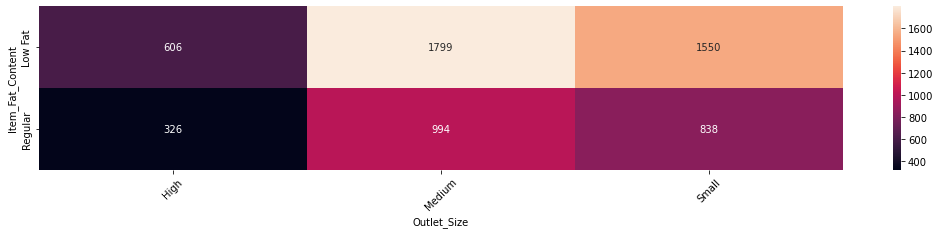

In [ ]:
# Generating a visual plot of Item_Fat_Content - Outlet_Size relation
fig = plt.figure(figsize = (18, 3))
sns.heatmap(pd.crosstab(index = outlet_size_data['Item_Fat_Content'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')
plt.xticks(rotation = 45);

- There does not seem to be any clear pattern between the variables **Item_Fat_Content** and **Outlet_Size**.

*Imputing Outlet_Size missing values with `Small` for `Grocery Store` outlet types and `Tier 2` Location Types*

In [ ]:
# Imputing on the training dataset

# Getting the indices
grocery_store_indices = train_df[train_df['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index
tier_2_indices = train_df[train_df['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

# Filling out missing values
train_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'
train_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

In [ ]:
# Imputing on the testing dataset

# Getting the indices
grocery_store_indices = test_df[test_df['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index
tier_2_indices = test_df[test_df['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

# Filling out missing values
test_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'
test_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

> **Checking again if we still have missing values in both train and test datasets.**

In [ ]:
# Checking for missing values in training dataset
train_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Checking for missing values in testing dataset
test_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

* There are **no more missing values** in the datasets.

#### **Feature Engineering**

> We are creating a new feature **`Outlet_Age`** which indicates how old the outlet is.

In [ ]:
# Creating Outlet_Age column on both datasets
train_df['Outlet_Age'] = 2013 - train_df['Outlet_Establishment_Year']
test_df['Outlet_Age'] = 2013 - test_df['Outlet_Establishment_Year']

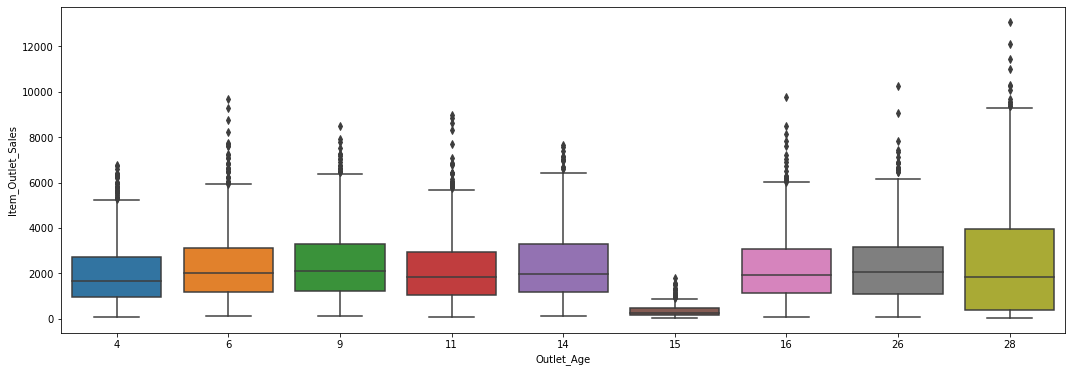

In [ ]:
# Checking the sales distribution across different Outlet_Age
fig = plt.figure(figsize = (18, 6))
sns.boxplot(x = 'Outlet_Age', y = 'Item_Outlet_Sales', data = train_df);

* The hypothesis that- **As the store gets older, the sales increase** does not seem to hold based on the above plot. Because of the different ages of stores, the sales have similar distribution approximately.
* But let's keep this variable as of now, and we will revisit this variable at the time of model building and we can remove this variable by observing its significance later on.

#### **Data preparation for modeling**

*Dropping Unnecessary Columns and isolating the target variable*

In [ ]:
# We are removing the outcome variable from the feature and variable Outlet_Establishment_Year, as we have created a new variable Outlet_Age
train_features = train_df.drop(['Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis = 1)

# And then we are extracting the outcome variable separately
train_target = train_df['Item_Outlet_Sales']

*Encoding Categorical Variables*

In [ ]:
# Creating dummy variables for the categorical variables
train_features = pd.get_dummies(train_features, drop_first = True)
train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,14,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,15,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,26,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


- Notice that the column names of all the categorical variables, and also the overall number of columns has increased after we created the dummy variables.
- For each of those categorical variables, the first category has been removed, e.g., the category **Low Fat** of the categorical variable **Item_Fat_Content** has been removed and became the **reference variable**, and we only have the category **Regular** as a new column **Item_Fat_Content_Regular**.

*Scaling Numerical Variables*

In [ ]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.416667,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


* Now, as the dataset is ready, we are set to build the model using the **statsmodels** package.

### **Building Models**

#### **Initial Model Training**

In [ ]:
# Adding the intercept term
train_features_scaled = sm.add_constant(train_features_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     405.8
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:10:59   Log-Likelihood:                -71993.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8495   BIC:                         1.442e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Observations:**

- We can see that the **R-squared** for the model is **0.563**.
- Not all the variables are statistically significant to predict the outcome variable. To check which variables are statistically significant or have predictive power to predict the target variable, we need to check the **p-value** against all the independent variables.



#### **Removing Multicollinearity**


In [ ]:
# Printing out the VIF of each feature
vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled.values, i) for i in range(train_features_scaled.shape[1])],
    index = train_features_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                              1726.732539
Item_Weight                           1.020069
Item_Visibility                       1.101104
Item_MRP                              1.013097
Outlet_Age                           50.920770
Item_Fat_Content_Regular              1.216554
Item_Type_Breads                      1.349903
Item_Type_Breakfast                   1.158313
Item_Type_Canned                      1.853160
Item_Type_Dairy                       1.906299
Item_Type_Frozen Foods                2.093663
Item_Type_Fruits and Vegetables       2.497446
Item_Type_Hard Drinks                 1.331158
Item_Type_Health and Hygiene          1.772040
Item_Type_Household                   2.289738
Item_Type_Meat                        1.581380
Item_Type_Others                      1.264019
Item_Type_Seafood                     1.091672
Item_Type_Snack Foods                 2.469391
Item_Type_Soft Drinks                 1.629102
Item_Type_Starchy Foods               1.211472

* Outlet_Age has a high VIF score. Hence, we are dropping Outlet_Age and building the model.

In [ ]:
# Checking VIF after dropping the Outlet_Age Column
train_features_scaled_new = train_features_scaled.drop("Outlet_Age", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new.values, i) for i in range(train_features_scaled_new.shape[1])],
    index = train_features_scaled_new.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                              121.234210
Item_Weight                          1.019998
Item_Visibility                      1.101084
Item_MRP                             1.013056
Item_Fat_Content_Regular             1.216511
Item_Type_Breads                     1.349602
Item_Type_Breakfast                  1.158304
Item_Type_Canned                     1.853098
Item_Type_Dairy                      1.906296
Item_Type_Frozen Foods               2.093418
Item_Type_Fruits and Vegetables      2.497273
Item_Type_Hard Drinks                1.331077
Item_Type_Health and Hygiene         1.772005
Item_Type_Household                  2.289719
Item_Type_Meat                       1.581366
Item_Type_Others                     1.263965
Item_Type_Seafood                    1.091509
Item_Type_Snack Foods                2.469340
Item_Type_Soft Drinks                1.629097
Item_Type_Starchy Foods              1.211469
Outlet_Size_Medium                  10.996151
Outlet_Size_Small   

* Now, let's build the model and observe the p-values.

In [ ]:
# Building the 2nd Model
ols_model_2 = sm.OLS(train_target, train_features_scaled_new)
ols_res_2 = ols_model_2.fit()

In [ ]:
# Getting the Model's Summary
print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     420.6
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:11:00   Log-Likelihood:                -71997.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8496   BIC:                         1.442e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

* We can see that all the categories in the `Item_Type` column show a **p-value higher than 0.05**. So, we can drop the `Item_Type` column.

In [ ]:
# Dropping the Item_Type categories and checking VIF

train_features_scaled_new2 = train_features_scaled_new.drop(['Item_Type_Breads',
'Item_Type_Breakfast',
'Item_Type_Canned',
'Item_Type_Dairy',
'Item_Type_Frozen Foods',
'Item_Type_Fruits and Vegetables',
'Item_Type_Hard Drinks',
'Item_Type_Health and Hygiene',
'Item_Type_Household',
'Item_Type_Meat',
'Item_Type_Others',
'Item_Type_Seafood',
'Item_Type_Snack Foods',
'Item_Type_Soft Drinks',
'Item_Type_Starchy Foods'], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new2.values, i) for i in range(train_features_scaled_new2.shape[1])],
    index = train_features_scaled_new2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                            109.302904
Item_Weight                        1.007465
Item_Visibility                    1.093183
Item_MRP                           1.000658
Item_Fat_Content_Regular           1.003054
Outlet_Size_Medium                10.986397
Outlet_Size_Small                 12.268475
Outlet_Location_Type_Tier 2        2.689564
Outlet_Location_Type_Tier 3        7.531382
Outlet_Type_Supermarket Type1      5.947977
Outlet_Type_Supermarket Type2      4.226075
Outlet_Type_Supermarket Type3      4.260682
dtype: float64



In [ ]:
# Training the 3rd model and printing out the summary
ols_model_3 = sm.OLS(train_target, train_features_scaled_new2)
ols_res_3 = ols_model_3.fit()
print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     994.9
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:11:00   Log-Likelihood:                -72000.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8511   BIC:                         1.441e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

* Now, from the p-values, we can see that **we can remove the `Item_Weight` column** as it **has the highest p-value**, i.e., it is the most insignificant variable.

In [ ]:
# Dropping the Item_Weight column and checking the VIF once again
train_features_scaled_new3 = train_features_scaled_new2.drop("Item_Weight", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new3.values, i) for i in range(train_features_scaled_new3.shape[1])],
    index = train_features_scaled_new3.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                            106.905754
Item_Visibility                    1.093065
Item_MRP                           1.000167
Item_Fat_Content_Regular           1.002641
Outlet_Size_Medium                10.977215
Outlet_Size_Small                 12.259457
Outlet_Location_Type_Tier 2        2.689448
Outlet_Location_Type_Tier 3        7.519408
Outlet_Type_Supermarket Type1      5.938545
Outlet_Type_Supermarket Type2      4.225983
Outlet_Type_Supermarket Type3      4.255095
dtype: float64



Let's build the model again.

In [ ]:
# Bulding the 4th Model
ols_model_4 = sm.OLS(train_target, train_features_scaled_new3)
ols_res_4 = ols_model_4.fit()
print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1095.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:11:01   Log-Likelihood:                -72000.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8512   BIC:                         1.441e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

* From the above p-values, both the categories of the column Outlet_Location_Type have a p-value lower than 0.05. So, we can remove the categories of Outlet_Location_Type.

In [ ]:
# Removnig the Outlet_Location_Type Column
train_features_scaled_new4 = train_features_scaled_new3.drop(["Outlet_Location_Type_Tier 2", "Outlet_Location_Type_Tier 3"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new4.values, i) for i in range(train_features_scaled_new4.shape[1])],
    index = train_features_scaled_new4.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                            27.169808
Item_Visibility                   1.092348
Item_MRP                          1.000143
Item_Fat_Content_Regular          1.002605
Outlet_Size_Medium                4.034011
Outlet_Size_Small                 2.814532
Outlet_Type_Supermarket Type1     2.478493
Outlet_Type_Supermarket Type2     2.842880
Outlet_Type_Supermarket Type3     2.863427
dtype: float64



In [ ]:
# Training the 5th model
ols_model_5 = sm.OLS(train_target, train_features_scaled_new4)
ols_res_5 = ols_model_5.fit()
print(ols_res_5.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1368.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:11:01   Log-Likelihood:                -72001.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8514   BIC:                         1.441e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

* From the above p-values, both the categories of the column `Outlet_Size` have a **p-value lower than 0.05.** So, we can remove the categories of Outlet_Size.

In [ ]:
# Removing the Outlet_Size column
train_features_scaled_new5 = train_features_scaled_new4.drop(["Outlet_Size_Small", "Outlet_Size_Medium"], axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new5.values, i) for i in range(train_features_scaled_new5.shape[1])],
    index = train_features_scaled_new5.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                            15.813401
Item_Visibility                   1.092314
Item_MRP                          1.000114
Item_Fat_Content_Regular          1.002581
Outlet_Type_Supermarket Type1     2.306663
Outlet_Type_Supermarket Type2     1.731428
Outlet_Type_Supermarket Type3     1.744734
dtype: float64



In [ ]:
# Training the 6th model
ols_model_6 = sm.OLS(train_target, train_features_scaled_new5)
ols_res_6 = ols_model_6.fit()
print(ols_res_6.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1824.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:11:01   Log-Likelihood:                -72002.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8516   BIC:                         1.441e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Finally, let's drop the Item_Visibility.

In [ ]:
# Dropping the Item_Visibility Column
train_features_scaled_new6 = train_features_scaled_new5.drop("Item_Visibility", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new6.values, i) for i in range(train_features_scaled_new6.shape[1])],
    index = train_features_scaled_new6.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                            11.452496
Item_MRP                          1.000114
Item_Fat_Content_Regular          1.000048
Outlet_Type_Supermarket Type1     2.125686
Outlet_Type_Supermarket Type2     1.654765
Outlet_Type_Supermarket Type3     1.658941
dtype: float64



In [ ]:
# Training the 7th Model
ols_model_7 = sm.OLS(train_target, train_features_scaled_new6)
ols_res_7 = ols_model_7.fit()
print(ols_res_7.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2188.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:11:01   Log-Likelihood:                -72003.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8517   BIC:                         1.441e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Observations:**

- All the VIF Scores are now less than 5 indicating no multicollinearity.
- Now, all the p values are lesser than 0.05 implying all the current variables are significant for the model.
- The R-Squared value did not change by much. It is still coming out to be ~0.56 which implies that all other variables were not adding any value to the model.

Lets' check the assumptions of the linear regression model.

#### **Checking linear regression assumptions and rebuilding the model**

**1. Check for mean residuals**

In [ ]:
# Residuals
residual = ols_res_7.resid
residual.mean()

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

**2. Tests for Normality**



<AxesSubplot:ylabel='Count'>

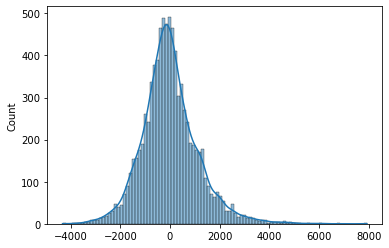

In [ ]:
# Plot histogram of residuals
sns.histplot(residual, kde = True)

We can see that the error terms are normally distributed. The assumption of normality is satisfied.

**3. Linearity of Variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test this assumption, we'll plot the residuals and the fitted values and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

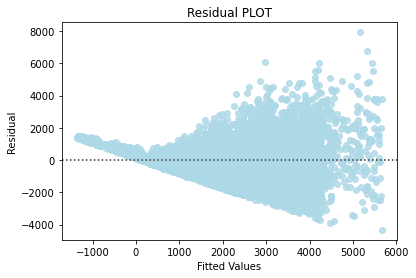

In [ ]:
# Predicted values
fitted = ols_res_7.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:**

- We can see that there is some pattern in fitted values and residuals, i.e., the residuals are not randomly distributed.
- Let's try to fix this. We can apply the log transformation on the target variable and try to build a new model.

*Re-fitting the model with log-transformed variables*

In [ ]:
# Log transformation on the target variable
train_target_log = np.log(train_target)

In [ ]:
# Fitting new model with the transformed target variable
ols_model_7 = sm.OLS(train_target_log, train_features_scaled_new6)
ols_res_7 = ols_model_7.fit()

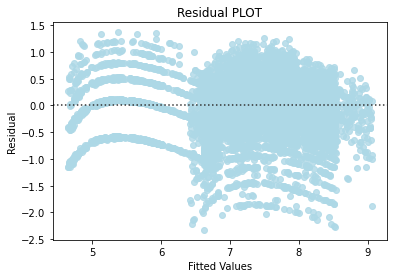

In [ ]:
# Predicted values
fitted = ols_res_7.fittedvalues

residual1 = ols_res_7.resid
sns.residplot(x = fitted, y = residual1, color = "lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:**

- We can see that there is no pattern in the residuals vs fitted values scatter plot now, i.e., the linearity assumption is satisfied.
- Let's check the model summary of the latest model we have fit.

In [ ]:
# Printing out the summary of the model
print(ols_res_7.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     4375.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:11:02   Log-Likelihood:                -6816.7
No. Observations:                8523   AIC:                         1.365e+04
Df Residuals:                    8517   BIC:                         1.369e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- The model performance has improved significantly. The R-Squared has increased from 0.56 to 0.720.



**4. Check for Heteroscedasticity**

* **Homoscedasticity -** If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* **Heteroscedasticity -** If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non symmetrical shape.

- We will use Goldfeld–Quandt test to check homoscedasticity.

    - Null hypothesis : Residuals are homoscedastic

    - Alternate hypothesis : Residuals are hetroscedastic

In [ ]:
# Importing the necessary packages

from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
# Carrying out the test

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(train_target_log, train_features_scaled_new6)
lzip(name, test)

[('F statistic', 0.9395156175145155), ('p-value', 0.9790604597916552)]

- As we observe from the above test, the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means the residuals are homoscedastic.

We have verified all the assumptions of the linear regression model. The final equation of the model is as follows:

**$\log ($ Item_Outlet_Sales $)$ $= 4.6356 + 1.9555 *$ Item_MRP$ + 0.0158 *$ Item_Fat_Content_Regular $ + 1.9550 *$ Outlet_Type_Supermarket Type1 $ + 1.7737 *$ Outlet_Type_Supermarket Type2$ + 2.4837*$ Outlet_Type_Supermarket Type3**

#### **Making the final test predictions**

In [ ]:
# Encoding features of the test dataset
without_const = train_features_scaled.iloc[:, 1:]
test_features = pd.get_dummies(test_df, drop_first = True)
test_features = test_features[list(without_const)]

# Applying transform on the test data
test_features_scaled = scaler.transform(test_features)
test_features_scaled = pd.DataFrame(test_features_scaled, columns = without_const.columns)
test_features_scaled = sm.add_constant(test_features_scaled)
test_features_scaled = test_features_scaled.drop(["Item_Weight", "Item_Visibility", "Item_Type_Breads", "Item_Type_Breakfast", "Item_Type_Canned", "Item_Type_Dairy","Item_Type_Frozen Foods","Item_Type_Fruits and Vegetables", "Item_Type_Hard Drinks", "Item_Type_Health and Hygiene", "Item_Type_Household", "Item_Type_Meat", "Item_Type_Others", "Item_Type_Seafood", "Item_Type_Snack Foods", "Item_Type_Soft Drinks", "Item_Type_Starchy Foods", "Outlet_Size_Medium", "Outlet_Size_Small", "Outlet_Location_Type_Tier 2", "Outlet_Location_Type_Tier 3", 'Outlet_Age'], axis = 1)
test_features_scaled.head()

,const,Item_MRP,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.0,0.325012,0.0,1.0,0.0,0.0
1,1.0,0.237819,1.0,1.0,0.0,0.0
2,1.0,0.893316,0.0,0.0,0.0,0.0
3,1.0,0.525233,0.0,1.0,0.0,0.0
4,1.0,0.861381,1.0,0.0,0.0,1.0


### **Model evaluation and Predictions on Test Dataset**

##### **Model Performance**

> **R-Squared**

The R-squared metric gives us an indication that how good/bad our model is from a baseline model. Here, we have explained ~98% variance in the data as compared to the baseline model when there is no independent variable.

In [ ]:
print(ols_res_7.rsquared)

0.71975057509795


> **Mean Squared Error**

This metric measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value.

In [ ]:
print(ols_res_7.mse_resid)

0.29009080646817975


> **Root Mean Squared Error**

This metric is the same as the above but, instead of simply taking the average, we also take the square root of MSE to get RMSE. This helps to get the metric in the same unit as the target variable.

In [ ]:
print(np.sqrt(ols_res_7.mse_resid))

0.5386007858035298


> **Checking Cross-Validated Score**

In [ ]:
# Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, train_features_scaled_new6, train_target_log, cv = 10)
cv_Score12 = cross_val_score(linearregression, train_features_scaled_new6, train_target_log, cv = 10,
                             scoring = 'neg_mean_squared_error')

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

RSquared: 0.718 (+/- 0.049)
Mean Squared Error: 0.290 (+/- 0.030)


**Observations:**

- The R-Squared on the cross-validation is 0.718 which is almost similar to the R-Squared on the training dataset.
- The MSE on cross-validation is 0.290 which is almost similar to the R-Squared on the training dataset.

It seems like that our model is **just right fit**. It is giving a generalized performance.

#### **Predictions on the Test Dataset**

In [ ]:
# These test predictions will be on a log scale
test_predictions = ols_res_7.predict(test_features_scaled)

# We are converting the log scale predictions to its original scale
test_predictions_inverse_transformed = np.exp(test_predictions)

test_predictions_inverse_transformed

0       1374.895044
1       1177.811420
2        591.395560
3       2033.800973
4       6765.005719
           ...     
5676    1843.793296
5677    1937.766915
5678    1504.855760
5679    3388.112463
5680    1106.508932
Length: 5681, dtype: float64

**Point to remember:** The output of this model is in log scale. So, after making prediction, we need to transform this value from log scale back to its original scale by doing the inverse of log transformation, i.e., taking exponentiation.</font>

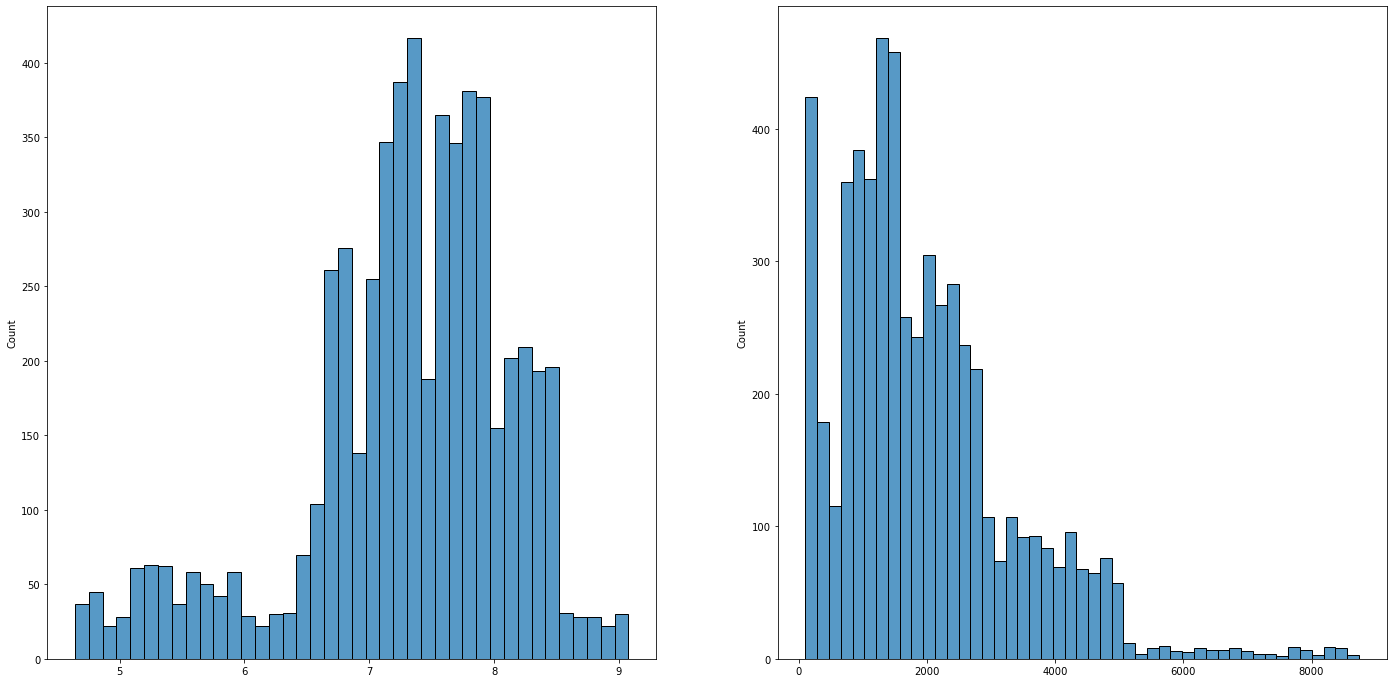

In [ ]:
# Plotting the predicted results on the Testing Dataset
fig, ax = plt.subplots(1, 2, figsize = (24, 12))
sns.histplot(test_predictions, ax = ax[0]);
sns.histplot(test_predictions_inverse_transformed, ax = ax[1]);

### **Conclusions and Recommendations**

**Summary and Conclusions**
- We performed EDA, univariate and bivariate analysis, on all the variables in the dataset.
- We then performed missing values treatment using the relationship between variables.
- We started the model building process with all the features.
- We removed multicollinearity from the data and analyzed the model summary report to drop insignificant features.
- We checked for different assumptions of linear regression and fixed the model iteratively if any assumptions did not hold true.
- Finally, we evaluated the model using different evaluation metrics.

**Machine Learning Model equation:**

**$\log ($ Item_Outlet_Sales $)$ $= 4.6356 + 1.9555 *$ Item_MRP$ + 0.0158 *$ Item_Fat_Content_Regular $ + 1.9550 *$ Outlet_Type_Supermarket Type1 $ + 1.7737 *$ Outlet_Type_Supermarket Type2$ + 2.4837*$ Outlet_Type_Supermarket Type3**

- From the above equation, we can interpret that, with one unit change in the variable **Item_MRP**, the outcome variable, i.e., log of **Item_Outlet_Sales** increases by 1.9555 units. So, if we want to increase the sales, we may want to store higher MRP items in the high visibility area.

- On average, keeping other factors constant, the log sales of stores with type Supermarket type 3 are 1.4 (2.4837/1.7737) times the log sales of stores with type 2 and 1.27 (2.4837/1.9550) times the log sales of those stores with type 1.

**Recommendations**
<p align = "justify">
After interpreting this linear regression equation, it is clear that large stores of supermarket type 3 have more sales than other types of outlets. So, we want to maintain or improve the sales in these stores and for the remaining ones, we may want to make strategies to improve the sales, for example, providing better customer service, better training for store staffs, providing more visibility of high MRP item, etc.